<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '>Business Understanding  
- [<font color='#000000'>Introduction </font>](#first-bullet)<br>   
- [<font color='#000000'>Objective of the Project</font>](#second-bullet)<br> 
   
### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 
- [<font color='#000000'>Import and Transform the format of Data</font>](#fourth-bullet)<br>
- [<font color='#000000'>CRISP-DM Methodology - Cross Industry Standard Process for Data Mining </font>](#sixth-bullet)<br>

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
- [<font color='#000000'>Outlier Detection and Treatment</font>](#thirteenth-bullet)<br>  
- [<font color='#000000'>Create new Features</font>](#eighteenth-bullet)<br>   
- [<font color='#000000'>One-Hot Encoding for Non-metric Features</font>](#nineteenth-bullet)<br>  
- [<font color='#000000'>Variables Distribution after the treatments</font>](#twelfth-bullet)<br>   
- [<font color='#000000'>Normalization</font>](#seventeenth-bullet)<br> 
- [<font color='#000000'>Separating Feature and Label variables</font>](#nineteen-bullet)<br>      
- [<font color='#000000'>Random Oversampling of Minority Class</font>](#fourteenth-bullet)<br>  
- [<font color='#000000'>Feature Selection</font>](#sixteenth-bullet)<br> 
- [<font color='#000000'>Final Selected Features</font>](#twentieth-bullet)<br>  
- [<font color='#000000'>TimeSeriesSplit</font>](#fortythird-bullet)<br> 
    
   
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Decision Tree</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Random Forest</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Logistic Regression</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Support Vector Classification</font>](#twentysixth-bullet)<br>   
- [<font color='#000000'>Model Selection</font>](#twentyseventh-bullet)<br> 
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Remember: library imports are ALWAYS at the top of the script, no exceptions!
# import sqlite3
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# from math import ceil
# import matplotlib.cm as cm
# import joblib
# import random
# from collections import Counter
# import datetime

# from collections import Counter
# from sklearn.preprocessing import StandardScaler

# #  RFE and Models
# # explore the number of selected features for RFE
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot
# # report which features were selected by RFE
# from sklearn.datasets import make_classification
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# import sklearn
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.linear_model import LassoCV
# from sklearn import preprocessing
# from sklearn.preprocessing import RobustScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import KFold
# from sklearn.model_selection import RepeatedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score 
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.svm import SVC
# from sklearn import metrics
# from sklearn.model_selection import StratifiedKFold

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_MATIC.csv')
df

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,1.379862,1.379862,1.465750,1.368370,1.417712,6.526199e+08
1822,2022-04-22,1.399139,1.399139,1.496747,1.374800,1.379697,1.281223e+09
1823,2022-04-23,1.365971,1.365971,1.406944,1.350815,1.399106,5.494467e+08
1824,2022-04-24,1.344245,1.344245,1.373304,1.335365,1.365753,4.209603e+08


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1826 non-null   object 
 1   MATIC-USD_ADJCLOSE  1094 non-null   float64
 2   MATIC-USD_CLOSE     1094 non-null   float64
 3   MATIC-USD_HIGH      1094 non-null   float64
 4   MATIC-USD_LOW       1094 non-null   float64
 5   MATIC-USD_OPEN      1094 non-null   float64
 6   MATIC-USD_VOLUME    1094 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
MATIC-USD_ADJCLOSE,732
MATIC-USD_CLOSE,732
MATIC-USD_HIGH,732
MATIC-USD_LOW,732
MATIC-USD_OPEN,732
MATIC-USD_VOLUME,732


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MATIC-USD_ADJCLOSE,1094.0,5.445221e-01,7.476557e-01,3.141000e-03,1.661275e-02,2.279150e-02,1.270481e+00,2.876757e+00
MATIC-USD_CLOSE,1094.0,5.445221e-01,7.476557e-01,3.141000e-03,1.661275e-02,2.279150e-02,1.270481e+00,2.876757e+00
MATIC-USD_HIGH,1094.0,5.742551e-01,7.878714e-01,3.380000e-03,1.733325e-02,2.461200e-02,1.346856e+00,2.923235e+00
MATIC-USD_LOW,1094.0,5.137250e-01,7.072027e-01,3.012000e-03,1.576600e-02,2.142400e-02,1.192344e+00,2.712710e+00
MATIC-USD_OPEN,1094.0,5.435889e-01,7.479900e-01,3.143000e-03,1.661575e-02,2.277200e-02,1.264971e+00,2.876459e+00
MATIC-USD_VOLUME,1094.0,5.387260e+08,9.962211e+08,2.938835e+06,1.772250e+07,5.196713e+07,7.551255e+08,9.181248e+09


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME
111,2017-08-15,NaN,NaN,NaN,NaN,NaN,NaN
191,2017-11-03,NaN,NaN,NaN,NaN,NaN,NaN
580,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN
1237,2020-09-14,0.020139,0.020139,0.020392,0.019593,0.019802,1.036343e+07
1104,2020-05-04,0.017049,0.017049,0.017351,0.015899,0.017125,3.053593e+07
1261,2020-10-08,0.016632,0.016632,0.017019,0.015558,0.017000,1.289732e+07
1762,2022-02-21,1.408787,1.408787,1.613639,1.405817,1.515127,1.583251e+09
1548,2021-07-22,0.880551,0.880551,0.928122,0.844062,0.888893,1.369987e+09
172,2017-10-15,NaN,NaN,NaN,NaN,NaN,NaN
1793,2022-03-24,1.628765,1.628765,1.634516,1.547749,1.556207,9.801860e+08


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
727,2019-04-23,NaN,NaN,NaN,NaN,NaN,NaN
728,2019-04-24,NaN,NaN,NaN,NaN,NaN,NaN
729,2019-04-25,NaN,NaN,NaN,NaN,NaN,NaN
730,2019-04-26,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME
0,2019-04-28,0.004421,0.004421,0.004545,0.004317,0.004521,8.408136e+06
1,2019-04-29,0.003471,0.003471,0.004492,0.003471,0.004418,8.267044e+06
2,2019-04-30,0.004478,0.004478,0.005078,0.003458,0.003462,2.507271e+07
3,2019-05-01,0.004374,0.004374,0.004673,0.004071,0.004440,1.056735e+07
4,2019-05-02,0.004198,0.004198,0.004700,0.004096,0.004366,6.714908e+06
...,...,...,...,...,...,...,...
1089,2022-04-21,1.379862,1.379862,1.465750,1.368370,1.417712,6.526199e+08
1090,2022-04-22,1.399139,1.399139,1.496747,1.374800,1.379697,1.281223e+09
1091,2022-04-23,1.365971,1.365971,1.406944,1.350815,1.399106,5.494467e+08
1092,2022-04-24,1.344245,1.344245,1.373304,1.335365,1.365753,4.209603e+08


#### __`Observations`__

- The Dataset presents __25902 duplicated records__ and  __missing values in the features “Children” and “Country”__. That may occur because it is common for hotels not to know this kind of information until the moment of check-in;


- Analyzing the Descriptive Statistics, , we found out  odd values in the variable “ADR” that stands for Average Daily Rate and the minimum value present in the distribution is 0. We noticed that a Coherence Check will be needed in the next phase;


- Looking at min, max, mean and 75% values of some variables like "ADR", "StaysInWeekendNights" and “StaysInWeekNights" we could conclude that an outlier treatment will be needed in the next phase.

# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME
0,2019-04-28,0.004421,0.004421,0.004545,0.004317,0.004521,8.408136e+06
1,2019-04-29,0.003471,0.003471,0.004492,0.003471,0.004418,8.267044e+06
2,2019-04-30,0.004478,0.004478,0.005078,0.003458,0.003462,2.507271e+07
3,2019-05-01,0.004374,0.004374,0.004673,0.004071,0.004440,1.056735e+07
4,2019-05-02,0.004198,0.004198,0.004700,0.004096,0.004366,6.714908e+06
...,...,...,...,...,...,...,...
1089,2022-04-21,1.379862,1.379862,1.465750,1.368370,1.417712,6.526199e+08
1090,2022-04-22,1.399139,1.399139,1.496747,1.374800,1.379697,1.281223e+09
1091,2022-04-23,1.365971,1.365971,1.406944,1.350815,1.399106,5.494467e+08
1092,2022-04-24,1.344245,1.344245,1.373304,1.335365,1.365753,4.209603e+08


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2019-04-28,0.004421,0.004421,0.004545,0.004317,0.004521,8408136.0,2.261938,5.281442
1,2019-04-29,0.003471,0.003471,0.004492,0.003471,0.004418,8267044.0,27.283211,29.415164
2,2019-04-30,0.004478,0.004478,0.005078,0.003458,0.003462,25072706.0,22.688701,46.847889
3,2019-05-01,0.004374,0.004374,0.004673,0.004071,0.004440,10567352.0,1.508917,14.787520
4,2019-05-02,0.004198,0.004198,0.004700,0.004096,0.004366,6714908.0,4.001914,14.746092


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')

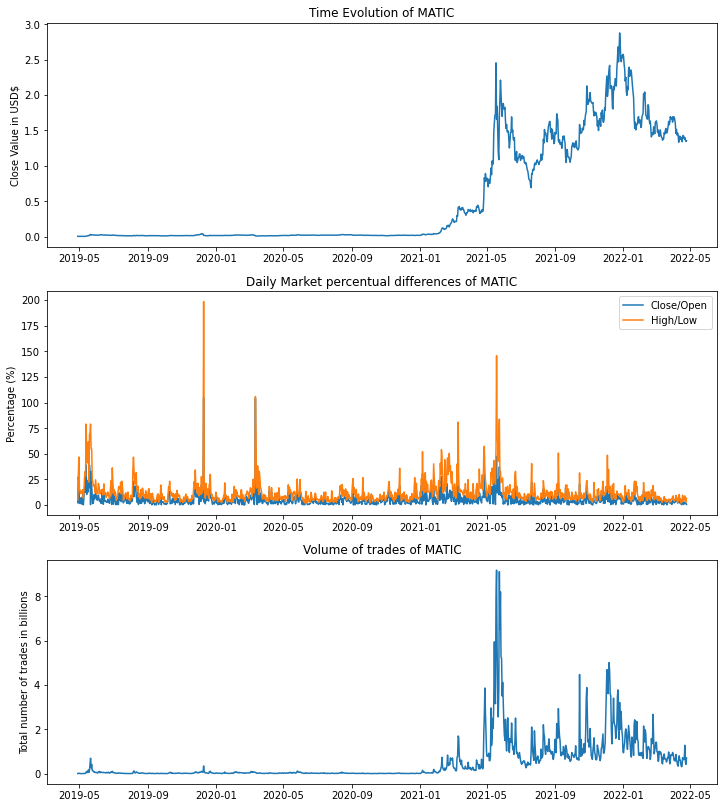

In [13]:
plot_coinValue(df)